##### Bibliotecas

In [1]:
import pandas as pd
from datetime import date
import numpy_financial as npf
import numpy as np
import requests
import investpy as inv
from tvDatafeed import TvDatafeed, Interval
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

##### Banco Central do Brasil

Códigos BCB:

Selic: 11 | CDI: 12 | IPCA: 433 | IGPM: 189 | SELIC Meta: 432 | 
Reservas Internacionais: 13621 | PNAD: 24369

In [11]:
def consulta_bc(codigo_bcb, data_ini = '01/01/1900', data_fim = date.today().strftime('%d/%m/%Y')):
  url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_bcb}/dados?formato=json&dataInicial={data_ini}&dataFinal={data_fim}'
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

##### CAPM

In [1]:
def capm(rf, bi, erm):
    premio = erm - rf
    eri = rf + (bi*(premio))
    return eri


##### Gera uma lista de empresas de determinado setor no site Fundamentus

In [2]:
def acoes_setor(setor):
    """
    Setores:
    1 - Agropecuária
    2 - Água e Saneamento
    3 - Alimentos Processados
    4 - Serv.Méd.Hospit. Análises e Diagnósticos
    5 - Automóveis e Motocicletas
    6 - Bebidas
    7 - Comércio
    8 - Comércio e Distribuição
    9 - Computadores e Equipamentos
    10 - Construção Civil
    11 - Construção e Engenharia
    12 - Diversos
    13 - 
    14 - Energia Elétrica
    15 - Equipamentos
    16 - Exploração de Imóveis
    17 - Gás
    18 - Holdings Diversificadas
    19 - Hoteis e Restaurantes
    20 - Intermediários Financeiros
    21 - Madeira e Papel
    22 - Máquinas e Equipamentos
    23 - Materiais Diversos
    24 - Material de Transporte
    25 - Medicamentos e Outros Produtos
    26 - Mídia
    27 - Mineração
    28 - Outros
    29 - 
    30 - Petróleo, Gás e Biocombustíveis
    31 - Previdência e Seguros
    32 - Produtos de Uso Pessoal e de Limpeza
    33 - Programas e Serviços
    34 - Químicos
    35 - 
    36 - Serviços Diversos
    37 - Serviços Financeiros Diversos
    38 - Siderurgia e Metalurgia
    39 - Tecidos, Vestuário e Calçados
    40 - Telecomunicações
    41 - Transporte
    42 - Utilidades Domésticas
    43 - Viagens e Lazer
 
    Output:
      List
    """
    url = f'http://www.fundamentus.com.br/resultado.php?setor={setor}'
    header = {'User-agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201' ,
           'Accept': 'text/html, text/plain, text/css, text/sgml, */*;q=0.01' ,
           'Accept-Encoding': 'gzip, deflate' ,
           }
    r = requests.get(url, headers=header)
    df = pd.read_html(r.text,  decimal=',', thousands='.')[0]
    return list(df['Papel'])

##### Gera uma lista de empresas de determinado segmento no site Fundamentus

In [ ]:
def acoes_segmento(segmento):
    """
    Segmentos:
    1 - Agricultura
    2 - Água e Saneamento
    3 - Açucar e Alcool
    4 - Alimentos Diversos
    5 - Carnes e Derivados
    6 - Serv.Méd.Hospit. Análises e Diagnósticos
    7 - 
    8 - 
    9 - 
    10 - 
    11 - 
    12 - 
    13 - 
    14 - 
    15 - 
    16 - 
    17 - 
    18 - 
    19 - 
    20 - 
    27 - Exploração de Imóveis
    
    86 - Viagens e Turismo

    Output:
      List
    """
    url = f'http://www.fundamentus.com.br/resultado.php?segmento={segmento}'
    header = {'User-agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201' ,
           'Accept': 'text/html, text/plain, text/css, text/sgml, */*;q=0.01' ,
           'Accept-Encoding': 'gzip, deflate' ,
           }
    r = requests.get(url, headers=header)
    df = pd.read_html(r.text,  decimal=',', thousands='.')[0]
    return list(df['Papel'])

##### Gera um DF com a informações das empresas
Como Ticker, Nome e Razão Social

In [5]:
def info_empresas():
    """
    Papel: Get list of names and descriptions
      URL:
        http://fundamentus.com.br/detalhes.php

    Output:
      df
    """

    url = 'http://fundamentus.com.br/detalhes.php'
    header = {'User-agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201',
           'Accept': 'text/html, text/plain, text/css, text/sgml, */*;q=0.01',
           'Accept-Encoding': 'gzip, deflate',
           }
    r = requests.get(url, headers=header)
    df = pd.read_html(r.text)[0]

    return df

In [2]:
def lista_fiis():
    url = 'https://fundamentus.com.br/fii_resultado.php'
    header = {'User-agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201',
            'Accept': 'text/html, text/plain, text/css, text/sgml, */*;q=0.01',
            'Accept-Encoding': 'gzip, deflate',
            }
    r = requests.get(url, headers=header)
    df = pd.read_html(r.text)[0]
    return list(df['Papel'])

##### Gera uma lista com todas as empresas da B3

In [6]:
def lista_empresas():
    """
    Papel: Get list of tickers
      URL:
        http://fundamentus.com.br/detalhes.php

    Output:
      list
    """

    url = 'http://fundamentus.com.br/detalhes.php'
    header = {'User-agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201',
           'Accept': 'text/html, text/plain, text/css, text/sgml, */*;q=0.01',
           'Accept-Encoding': 'gzip, deflate',
           }
    r = requests.get(url, headers=header)
    df = pd.read_html(r.text)[0]

    return list(df['Papel'])

##### Coleta detalhes da empresa no site Fundamentus

In [10]:
def detalhe_empresa(ticker):
    """
    Papel: Get list of names and descriptions
      URL:
        http://fundamentus.com.br/detalhes.php?papel=

    Output:
      df
    """

    url = f'http://fundamentus.com.br/detalhes.php?papel={ticker}'
    header = {'User-agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201',
           'Accept': 'text/html, text/plain, text/css, text/sgml, */*;q=0.01',
           'Accept-Encoding': 'gzip, deflate',
           }
    r = requests.get(url, headers=header)
    df = pd.read_html(r.text)[0]

    return df

In [11]:
detalhe_empresa('ITUB4')

,0,1,2,3
0,?Papel,ITUB4,?Cotação,2764
1,?Tipo,PN N1,?Data últ cot,14/09/2023
2,?Empresa,ITAUUNIBANCO PN N1,?Min 52 sem,2270
3,?Setor,Intermediários Financeiros,?Max 52 sem,2989
4,?Subsetor,Bancos,?Vol $ méd (2m),751.591.000


##### A

In [14]:
inv.get_index_historical_data('Bovespa', country='brazil', from_date='15/03/2023', to_date='14/09/2023')

ConnectionError: ERR#0015: error 403, try again later.

In [7]:
inv.get_stocks_list('brazil')

['ABCB4',
 'AGRO3',
 'RAIL3',
 'ALPA3',
 'ALPA4',
 'ALSO3',
 'AMAR3',
 'ABEV3',
 'ADHM3',
 'ARZZ3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBRK3',
 'BEEF3',
 'BPHA3',
 'BPAN4',
 'BRAP3',
 'BRAP4',
 'BRFS3',
 'APER3',
 'BRKM3',
 'BRKM5',
 'BRML3',
 'BRPR3',
 'BRSR6',
 'OIBR3',
 'OIBR4',
 'BTOW3',
 'B3SA3',
 'CAMB4',
 'CARD3',
 'CCPR3',
 'CCRO3',
 'CEDO4',
 'CEED3',
 'CESP6',
 'CGAS5',
 'CGRA4',
 'CIEL3',
 'CMIG3',
 'CMIG4',
 'COCE5',
 'CPFE3',
 'CPLE3',
 'CPLE6',
 'CRDE3',
 'CSAN3',
 'CSMG3',
 'CSNA3',
 'LIQO3',
 'CTNM4',
 'CYRE3',
 'DASA3',
 'DIRR3',
 'DTEX3',
 'ECOR3',
 'EEEL3',
 'ELEK4',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENGI4',
 'EQTL3',
 'YDUQ3',
 'ETER3',
 'EUCA4',
 'EVEN3',
 'EZTC3',
 'FESA4',
 'FHER3',
 'TASA4',
 'FLRY3',
 'FRIO3',
 'TIET3',
 'TIET4',
 'GFSA3',
 'GGBR3',
 'GGBR4',
 'GOAU3',
 'GOAU4',
 'GOLL4',
 'GRND3',
 'GSHP3',
 'HBOR3',
 'HGTX3',
 'PRIO3',
 'HYPE3',
 'IDNT3',
 'IDVL4',
 'IGTA3',
 'MEAL3',
 'INEP3',
 'INEP4',
 'ITSA3',
 'ITSA4',
 'ITUB3',
 'ITUB4',
 'JBSS3',


In [5]:
inv.get_stock_historical_data(stock='PETR4', country='brazil', from_date='15/08/2023', to_date='15/09/2023')

ConnectionError: ERR#0015: error 403, try again later.

In [3]:
date.today()

datetime.date(2023, 9, 15)

In [7]:
data_yf = yf.download('PETR4.SA')

[*********************100%***********************]  1 of 1 completed


In [8]:
data_yf.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-09-01', '2023-09-04', '2023-09-05', '2023-09-06',
               '2023-09-08', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15'],
              dtype='datetime64[ns]', name='Date', length=5956, freq=None)

In [9]:
data_yf.index.year

Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='Date', length=5956)

In [12]:
data_yf = yf.download('PETR4.SA', interval='1mo')['Close']
data_yf

[*********************100%***********************]  1 of 1 completed


Date
2000-02-01     5.775000
2000-03-01     5.900000
2000-04-01     5.376000
2000-05-01     5.238000
2000-06-01     6.812500
                ...    
2023-05-01    26.120001
2023-06-01    29.530001
2023-07-01    31.110001
2023-08-01    31.940001
2023-09-01    33.889999
Name: Close, Length: 284, dtype: float64

In [56]:
data_yf = yf.download('PETR4.SA', start='2021-01-01', interval='1mo')['Close'].pct_change()
data_yf.describe

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.describe of Date
2021-01-01         NaN
2021-02-01   -0.166729
2021-03-01    0.083633
2021-04-01   -0.019917
2021-05-01    0.137595
2021-06-01    0.095274
2021-07-01   -0.085627
2021-08-01    0.010405
2021-09-01    0.001471
2021-10-01   -0.002938
2021-11-01    0.083978
2021-12-01   -0.031600
2022-01-01    0.135088
2022-02-01    0.051005
2022-03-01   -0.016176
2022-04-01   -0.094768
2022-05-01   -0.007266
2022-06-01   -0.070858
2022-07-01    0.222700
2022-08-01   -0.026940
2022-09-01   -0.103220
2022-10-01    0.000336
2022-11-01   -0.105669
2022-12-01   -0.081020
2023-01-01    0.064082
2023-02-01   -0.031837
2023-03-01   -0.070919
2023-04-01    0.010661
2023-05-01    0.102110
2023-06-01    0.130551
2023-07-01    0.053505
2023-08-01    0.026680
2023-09-01    0.061052
Name: Close, dtype: float64>

In [57]:
retorno_mensal = data_yf.groupby([data_yf.index.year.rename('Ano'), data_yf.index.month.rename('Mês')]).mean()
retorno_mensal


Ano   Mês
2021  1           NaN
      2     -0.166729
      3      0.083633
      4     -0.019917
      5      0.137595
      6      0.095274
      7     -0.085627
      8      0.010405
      9      0.001471
      10    -0.002938
      11     0.083978
      12    -0.031600
2022  1      0.135088
      2      0.051005
      3     -0.016176
      4     -0.094768
      5     -0.007266
      6     -0.070858
      7      0.222700
      8     -0.026940
      9     -0.103220
      10     0.000336
      11    -0.105669
      12    -0.081020
2023  1      0.064082
      2     -0.031837
      3     -0.070919
      4      0.010661
      5      0.102110
      6      0.130551
      7      0.053505
      8      0.026680
      9      0.061052
Name: Close, dtype: float64

In [58]:
tabela_retornos = pd.DataFrame(retorno_mensal)
tabela_retornos = pd.pivot_table(tabela_retornos, values='Close',index = 'Ano', columns = 'Mês')
tabela_retornos.columns = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
tabela_retornos

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Ano,,,,,,,,,,,,
2021,NaN,-0.166729,0.083633,-0.019917,0.137595,0.095274,-0.085627,0.010405,0.001471,-0.002938,0.083978,-0.03160
2022,0.135088,0.051005,-0.016176,-0.094768,-0.007266,-0.070858,0.222700,-0.026940,-0.103220,0.000336,-0.105669,-0.08102
2023,0.064082,-0.031837,-0.070919,0.010661,0.102110,0.130551,0.053505,0.026680,0.061052,NaN,NaN,NaN


In [59]:
stats = pd.DataFrame(tabela_retornos.mean(), columns = ['Média'])
stats['Mediana'] = tabela_retornos.median()
stats['Maior'] = tabela_retornos.max()
stats['Menor'] = tabela_retornos.min()
stats['Positivos'] = tabela_retornos.gt(0).sum()/tabela_retornos.count()
stats['Negativos'] = tabela_retornos.le(0).sum()/tabela_retornos.count()
stats

,Média,Mediana,Maior,Menor,Positivos,Negativos
Jan,0.099585,0.099585,0.135088,0.064082,1.000000,0.000000
Fev,-0.049187,-0.031837,0.051005,-0.166729,0.333333,0.666667
Mar,-0.001154,-0.016176,0.083633,-0.070919,0.333333,0.666667
Abr,-0.034675,-0.019917,0.010661,-0.094768,0.333333,0.666667
Mai,0.077480,0.102110,0.137595,-0.007266,0.666667,0.333333
Jun,0.051656,0.095274,0.130551,-0.070858,0.666667,0.333333
Jul,0.063526,0.053505,0.222700,-0.085627,0.666667,0.333333
Ago,0.003382,0.010405,0.026680,-0.026940,0.666667,0.333333
Set,-0.013566,0.001471,0.061052,-0.103220,0.666667,0.333333
Out,-0.001301,-0.001301,0.000336,-0.002938,0.500000,0.500000


In [31]:
stats_a = stats[['Média', 'Mediana', 'Maior', 'Menor']]
stats_a = stats_a.transpose()
stats_a

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Média,0.009419,0.009568,0.017689,0.030934,-0.000222,0.009885,0.014479,0.024097,0.003002,0.034943,-0.012378,0.013888
Mediana,-0.007329,0.012877,0.016582,-0.004628,-0.007274,-0.014560,0.018578,0.012583,0.026465,0.011696,-0.040803,0.035335
Maior,0.263101,0.192069,0.616732,0.351967,0.166215,0.300592,0.260085,0.223037,0.154215,0.309625,0.314678,0.215956
Menor,-0.277612,-0.166729,-0.447908,-0.126316,-0.214076,-0.193918,-0.223112,-0.123928,-0.225599,-0.335897,-0.159686,-0.218847


In [32]:
stats_b = stats[['Positivos', 'Negativos']]
stats_b = stats_b.transpose()
stats_b

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Positivos,0.478261,0.608696,0.541667,0.5,0.416667,0.458333,0.666667,0.541667,0.583333,0.608696,0.347826,0.565217
Negativos,0.521739,0.391304,0.458333,0.5,0.583333,0.541667,0.333333,0.458333,0.416667,0.391304,0.652174,0.434783


Text(120.72222222222221, 0.5, '')

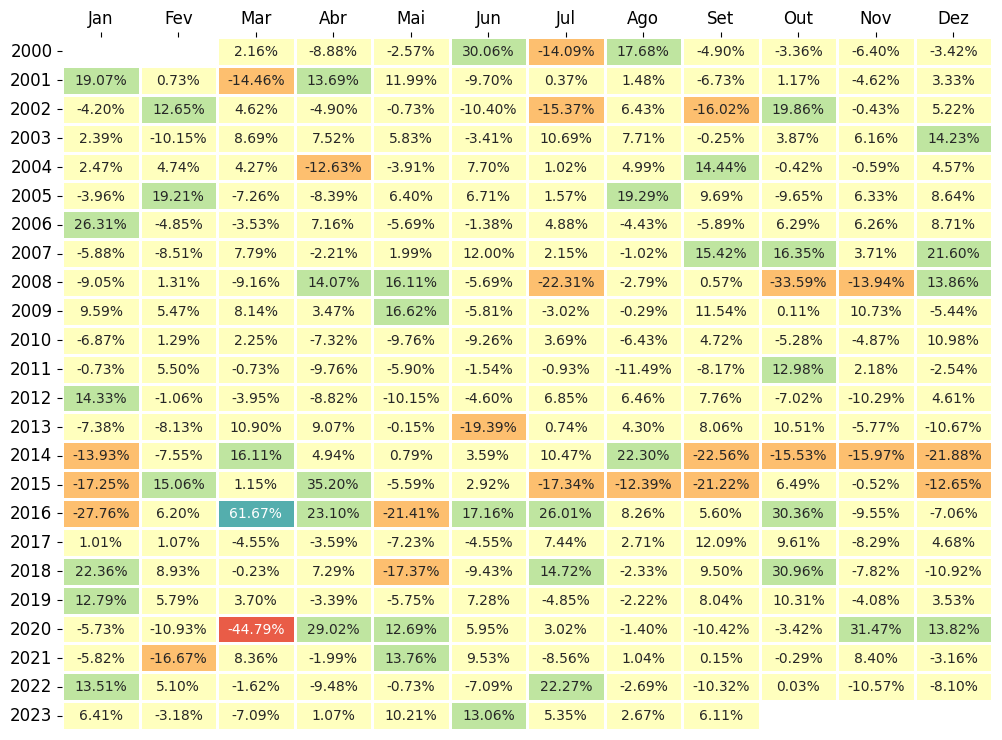

In [48]:
fig, ax = plt.subplots(figsize = (12, 9))
color = sns.color_palette('Spectral', 5)
sns.heatmap(tabela_retornos, cmap = color, annot = True, fmt = '.2%', center = 0,
            cbar = False, linewidths = 1, xticklabels = True, yticklabels = True, ax = ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, verticalalignment = 'center', fontsize = '12')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = '12')
ax.xaxis.tick_top()
plt.ylabel('')


In [1]:
import fundamentus as fd

2023-09-28 15:52:55,044 [logging.log_init] INFO: LOGLEVEL=INFO


In [2]:
petr4 = fd.get_detalhes_papel('PETR4')
petr4

,Papel,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Ativo_Circulante,Div_Bruta,Div_Liquida,Patrim_Liq,Receita_Liquida_12m,EBIT_12m,Lucro_Liquido_12m,Receita_Liquida_3m,EBIT_3m,Lucro_Liquido_3m
PETR4,PETR4,PN,PETROBRAS PN,"Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",34.52,2023-09-27,17.40,34.52,1631620000,...,136816000000,279375000000,218390000000,370683000000,581563000000,261516000000,156375000000,113840000000,49813000000,28782000000


In [3]:
petr4.columns

Index(['Papel', 'Tipo', 'Empresa', 'Setor', 'Subsetor', 'Cotacao',
       'Data_ult_cot', 'Min_52_sem', 'Max_52_sem', 'Vol_med_2m',
       'Valor_de_mercado', 'Valor_da_firma', 'Ult_balanco_processado',
       'Nro_Acoes', 'PL', 'PVP', 'PEBIT', 'PSR', 'PAtivos', 'PCap_Giro',
       'PAtiv_Circ_Liq', 'Div_Yield', 'EV_EBITDA', 'EV_EBIT', 'Cres_Rec_5a',
       'LPA', 'VPA', 'Marg_Bruta', 'Marg_EBIT', 'Marg_Liquida', 'EBIT_Ativo',
       'ROIC', 'ROE', 'Liquidez_Corr', 'Div_Br_Patrim', 'Giro_Ativos', 'Ativo',
       'Disponibilidades', 'Ativo_Circulante', 'Div_Bruta', 'Div_Liquida',
       'Patrim_Liq', 'Receita_Liquida_12m', 'EBIT_12m', 'Lucro_Liquido_12m',
       'Receita_Liquida_3m', 'EBIT_3m', 'Lucro_Liquido_3m'],
      dtype='object')